In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_df = pd.read_csv("SpotGenTrack/DataSources/by_location.csv")

In [7]:
data_df.shape

(3150, 9)

Features ->
Country : Country name or "Global"
Continent : Continent name
Rank : Song rank specific to country
Title : Title of the song
Artists : Artist(s) of the song
Album : Album name
Explicit : If the track is explicit?
Duration : Duration of the track

In [8]:
data_df.head(5)

,Country,Continent,Rank,Title,Artists,Album,Explicit,Duration,Popularity
0,Global,Global,1,Rain On Me (with Ariana Grande),"Lady Gaga, Ariana Grande",Rain On Me (with Ariana Grande),0,3:02,32
1,Global,Global,2,Blinding Lights,The Weeknd,After Hours,0,3:20,80
2,Global,Global,3,ROCKSTAR (feat. Roddy Ricch),"DaBaby, Roddy Ricch",BLAME IT ON BABY,1,3:01,34
3,Global,Global,4,Roses - Imanbek Remix,"SAINt JHN, Imanbek",Roses (Imanbek Remix),1,2:56,90
4,Global,Global,5,Toosie Slide,Drake,Dark Lane Demo Tapes,1,4:07,12


1. Exploratory Data Analysis
   Starting by individually exploring each feature.

In [9]:
unique_countries = data_df["Country"].unique()
unique_countries = unique_countries[unique_countries != "Global"]
unique_countries

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam'], dtype=object)

In [10]:
from geopy.geocoders import Nominatim

latitude = []
longitude = []
geolocator = Nominatim(user_agent="my-app")

for i in unique_countries:
    location = geolocator.geocode(i)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [11]:
import folium
 
data = pd.DataFrame({
   'lat':latitude,
   'lon':longitude,
   'name':unique_countries,
    'value':[20.0]*62
})
 
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
 
    
for i in range(0,len(data)):
    folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000,
      color='#1db954',
      fill=True,
      fill_color='#1db954'
   ).add_to(m)
    
m

In [12]:
data_df["Continent"].unique()

array(['Global', 'South America', 'Australia', 'Europe', 'North America',
       'Asia', 'Africa'], dtype=object)

In [13]:
continent_value_counts = (data_df["Continent"].value_counts()/50).astype("int32")
continent_value_counts = continent_value_counts.drop("Global")


In [14]:
continent_value_counts

Europe           29
Asia             11
North America    10
South America     9
Australia         2
Africa            1
Name: Continent, dtype: int32

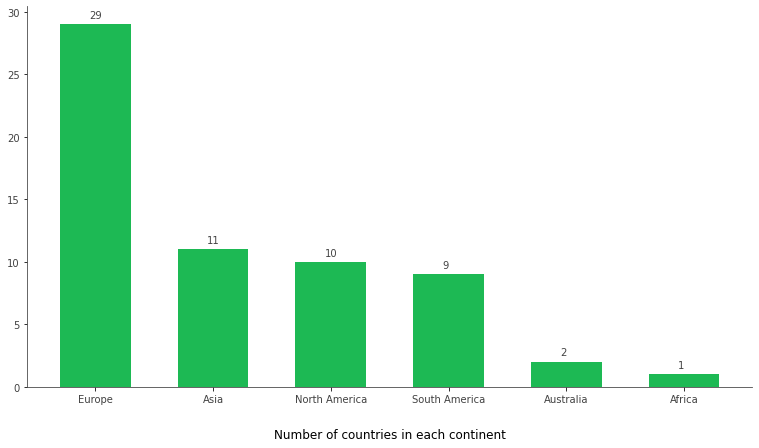

In [15]:
height = continent_value_counts.values
bars = continent_value_counts.index
y_pos = range(0,12,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=1.2)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+0.5, str(v), color='#424242')
plt.title("Number of countries in each continent", y=-0.15)

plt.show()


Title
10 Most Popular Tracks

In [16]:
top10_tracks = data_df["Title"].value_counts()[:10].sort_values(ascending=True)

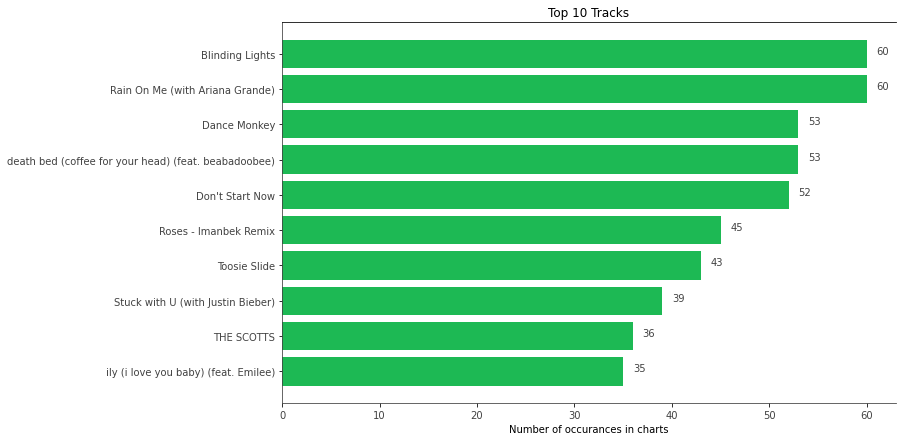

In [34]:
height = top10_tracks.values
bars = top10_tracks.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Tracks")


plt.show()

Artists
10 Most Popular Artists

Preprocessing the Artists columns because some tracks have multiple artists.

In [18]:
Artists = []
for i in data_df["Artists"]:
    a = i.split(", ")
    Artists = Artists + a

In [19]:
top10_artists = pd.Series(Artists).value_counts()[:10].sort_values(ascending=True)

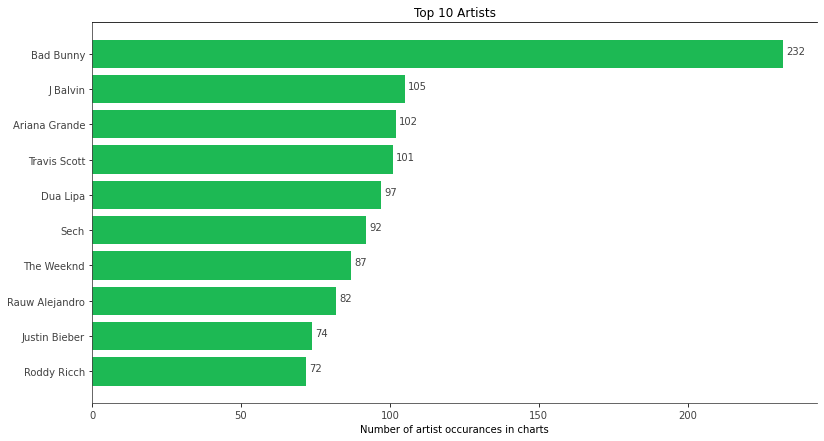

In [20]:
height = top10_artists.values
bars = top10_artists.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.barh(y_pos, height, color="#1db954", height=0.8)
 
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of artist occurances in charts")

for i, v in enumerate(height):
    ax.text(v+1, i, str(v), color='#424242')
plt.title("Top 10 Artists")


plt.show()

Duration
First we will convert string data to int.

In [21]:
seconds = []
for i in data_df["Duration"]:
    val = i.split(":")
    secs = int(val[0])*60 + int(val[1])
    seconds.append(secs)

c:\Users\Akshita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


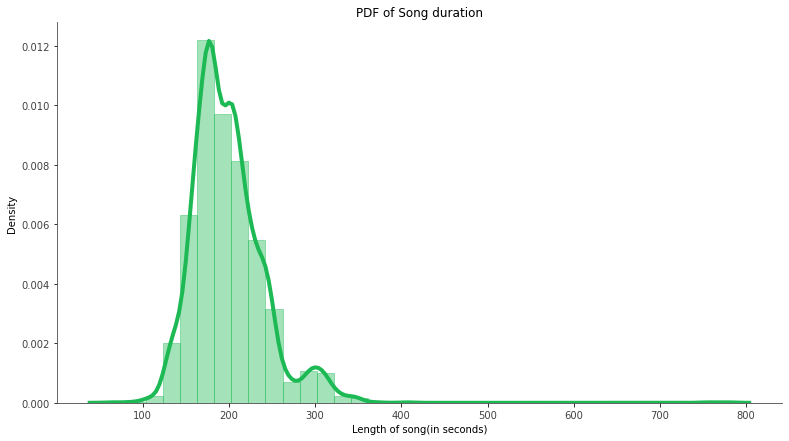

In [22]:
fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.distplot(seconds, hist=True, kde=True, bins=int(180/5), color = '#1db954',  hist_kws={'edgecolor':'#1db954'},
             kde_kws={'linewidth': 4})
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("PDF of Song duration")

plt.show()

In [23]:
data_df["duration_in_s"] = seconds
duration_by_c = data_df.groupby("Country").mean()["duration_in_s"]

In [24]:
bottom5_duration = duration_by_c.sort_values()[:5]
bottom5_duration

Country
Germany    176.56
Sweden     179.50
Brazil     181.80
Austria    182.10
Denmark    184.22
Name: duration_in_s, dtype: float64

In [25]:
top5_duration = duration_by_c.sort_values(ascending=False)[:5]
top5_duration

Country
Japan        264.10
Indonesia    236.54
Thailand     223.00
Taiwan       220.66
India        217.16
Name: duration_in_s, dtype: float64

In [26]:
filtered_data1 = data_df[(data_df["Country"].isin(list(top5_duration.index))) + (data_df["Country"].isin(list(bottom5_duration.index)))]

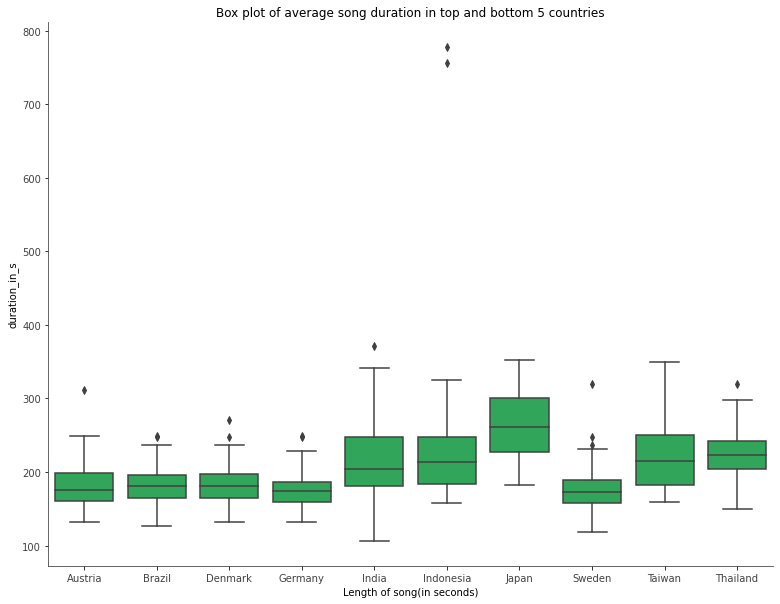

In [27]:
fig = plt.figure(figsize=[13,10], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

sns.boxplot( x = filtered_data1["Country"], y = filtered_data1["duration_in_s"], color = '#1db954')
 
plt.xticks(color="#424242")
plt.yticks(color="#424242")
plt.xlabel("Length of song(in seconds)")
plt.title("Box plot of average song duration in top and bottom 5 countries")

plt.show()

Explicit
The number of explicit songs in our overall dataset.

In [29]:
exp_data = data_df["Explicit"].value_counts().sort_values()
exp_data

1    1099
0    2051
Name: Explicit, dtype: int64

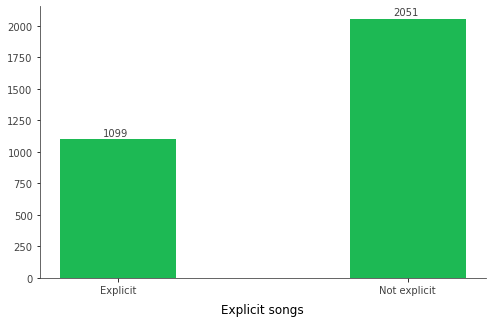

In [30]:
height = exp_data.values
bars = ["Explicit", "Not explicit"]
y_pos = range(0,4,2)

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
for i, v in enumerate(height):
    ax.text((i)*2 - 0.1, v+30, str(v), color='#424242')
plt.title("Explicit songs", y=-0.15)

plt.show()

In [31]:
exp_data_cont = data_df.groupby("Continent").mean()["Explicit"]
exp_data_cont

Continent
Africa           0.460000
Asia             0.185455
Australia        0.440000
Europe           0.404138
Global           0.460000
North America    0.394000
South America    0.275556
Name: Explicit, dtype: float64

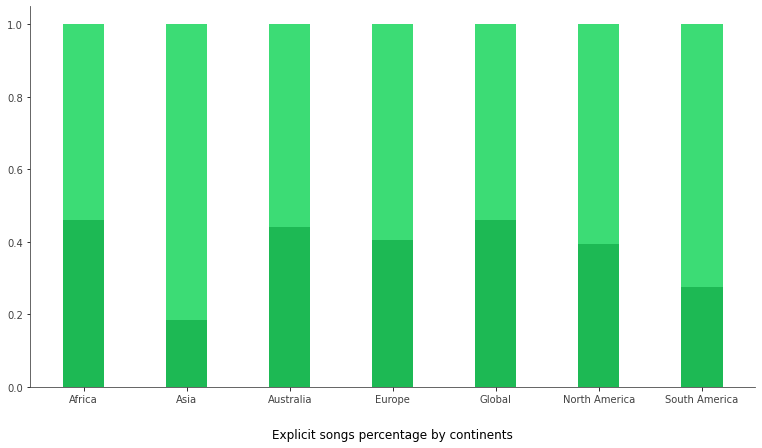

In [32]:
height = exp_data_cont.values
bars = exp_data_cont.index
y_pos = range(0,14,2)

fig = plt.figure(figsize=[13,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

plt.bar(y_pos, height, color="#1db954", width=0.8)
plt.bar(y_pos, 1 - height, bottom = height,color="#3CDC75", width=0.8)
 
plt.xticks(y_pos, bars, color="#424242")
plt.yticks(color="#424242")
'''
for i, v in enumerate(height):
    ax.text((i)*2 - 0.2, v+0.01, str(np.round(v,2)), color='#424242')
'''
plt.title("Explicit songs percentage by continents", y=-0.15)

plt.show()

Turns out Asian countries don't prefer Explicit songs (18% approx.) as compared to other countries. Also, "Global Top 50 Chart" has 23 explicit songs.

2.  Conclusions
    1. Dataset is imbalanced with more Europian countries.
    2. Few songs have managed to make in 96% of Top Charts of all countries.
    3. Even though few artists have many occurances in the Top charts, they don't have any song in Top 10 tracks occurances.
    4. Average song duration preferred by most is around 3:00 minutes to 3:20 minutes
    5. People in Asian countries prefer longer song duration. Europian countries mostly listen to songs close to or less than 3 minutes.
    6. Asian countries prefer less of explicit songs, only 18%, compared to world average of 35%. "Global Top 50 Chart" has 23 explicit songs.